# Dependency code

In [1]:
import imp
import os
import sys
import numpy as np
import glob
import cmdbench

fp, pathname, description = imp.find_module('benchmark', ['../lib'])
benchmark = imp.load_module('benchmark', fp, pathname, description)

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

# Software versions

In [2]:
!skesa --version

skesa --version 

SKESA 2.4.0


# Benchmarking

## Input data and constants

In [3]:
input_dir = 'input-small'
input_files_1 = [os.path.basename(f) for f in glob.glob(f'{input_dir}/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_files_1]
input_samples.sort()
print(input_samples)

skesa_out = 'skesa-output'

nproc = 4

#sample_sizes = [1,10,20,30,40,50,60,70,80]
sample_sizes = [1,5,10]

benchmark.create_folder_if_doesnt_exist(skesa_out)

['2014C-3598', '2014C-3599', '2014C-3600', '2014C-3655', '2014C-3656', '2014C-3840', '2014C-3850', '2014C-3857', '2014C-3907', '2014D-0067', '2014D-0068', '2014D-0070', '2014D-0189', 'CFSAN000189', 'CFSAN000191', 'CFSAN000211', 'CFSAN000212', 'CFSAN000228', 'CFSAN000661', 'CFSAN000669', 'CFSAN000700', 'CFSAN000752', 'CFSAN000753', 'CFSAN000951', 'CFSAN000952', 'CFSAN000954', 'CFSAN000958', 'CFSAN000960', 'CFSAN000961', 'CFSAN000963', 'CFSAN000968', 'CFSAN000970', 'CFSAN001112', 'CFSAN001115', 'CFSAN001118', 'CFSAN001140', 'CFSAN002349', 'CFSAN023463', 'CFSAN023464', 'CFSAN023465', 'CFSAN023466', 'CFSAN023467', 'CFSAN023468', 'CFSAN023469', 'CFSAN023470', 'CFSAN023471', 'D5663', 'D7316', 'D7319', 'D7320', 'D7321', 'D7322', 'D7323', 'D7324', 'D7327', 'D7328', 'D7329', 'D7330', 'D7331', 'D7333', 'D7334', 'MOD1_LS1000', 'MOD1_LS1003', 'MOD1_LS1004', 'MOD1_LS1005', 'MOD1_LS1006', 'MOD1_LS1008', 'MOD1_LS1009', 'MOD1_LS1010', 'MOD1_LS1011', 'MOD1_LS982', 'MOD1_LS985', 'MOD1_LS989', 'MOD1_LS99

## Benchmark functions

In [4]:
def reset_func():
    benchmark.clean_if_exists(skesa_out)
        
def sampling_func(sample_size):
    samples = input_samples[:sample_size]
    return samples

## Benchmark

In [5]:
assembly_command = {
    "command": f"skesa --fastq {input_dir}/%_1.fastq.gz,{input_dir}/%_2.fastq.gz --cores 1 --contigs_out {skesa_out}/%.fasta",
    "parallel_args": f"-j {nproc} -I%"
}

# active_output_print: prints stdout and stderr on every iteration
multibench_results, debug_str = benchmark.multibench.multi_cmdbench({
    "assembly": [assembly_command]
    },
    reset_func = reset_func, iterations = 1, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark.benchmark_list_to_results, active_output_print = True
)

>>>>>>>>>>>>>
parallel -j 4 -I% skesa --fastq input-small/%_1.fastq.gz,input-small/%_2.fastq.gz --cores 1 --contigs_out skesa-output/%.fasta ::: 2014C-3598

STDOUT: 
-------------
STDERR: skesa --fastq input-small/2014C-3598_1.fastq.gz,input-small/2014C-3598_2.fastq.gz --cores 1 --contigs_out skesa-output/2014C-3598.fasta 

Total mates: 2000 Paired reads: 1000
Reads acquired in  0.029235s wall, 0.030000s user + 0.000000s system = 0.030000s CPU (102.6%)

Kmer len: 19
Raw kmers: 431072 Memory needed (GB): 0.00827658 Memory available (GB): 29.9998 1 cycle(s) will be performed
Distinct kmers: 0
Kmer count in  0.157667s wall, 0.160000s user + 0.000000s system = 0.160000s CPU (101.5%)
Uniq kmers merging in  0.000615s wall, 0.000000s user + 0.000000s system = 0.000000s CPU (n/a%)
Adapters: 0 Reads before: 2000 Sequence before: 467072 Reads after: 2000 Sequence after: 467072 Reads clipped: 0
Adapters clipped in  0.158443s wall, 0.160000s user + 0.000000s system = 0.160000s CPU (101.0%)

Kmer l

# Save and reload results

In [6]:
save_path = "multibench_results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

benchmark.multibench.save_multibench_results(multibench_results, samples_per_sample_size, save_path)

multibench_results, samples_per_sample_size = benchmark.multibench.read_multibench_results(save_path)
print(samples_per_sample_size)

[['2014C-3598'], ['2014C-3598,', '2014C-3599,', '2014C-3600,', '2014C-3655,', '2014C-3656'], ['2014C-3598,', '2014C-3599,', '2014C-3600,', '2014C-3655,', '2014C-3656,', '2014C-3840,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014D-0067']]


# Plot

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 1.28, 'memory': 32673792.0, 'disk_read': 1317460.0, 'disk_write': 579338.0}, {'runtime': 1.49, 'memory': 63950848.0, 'disk_read': 2559851.0, 'disk_write': 808724.0}, {'runtime': 2.41, 'memory': 63700992.0, 'disk_read': 3774052.0, 'disk_write': 1551069.0}]


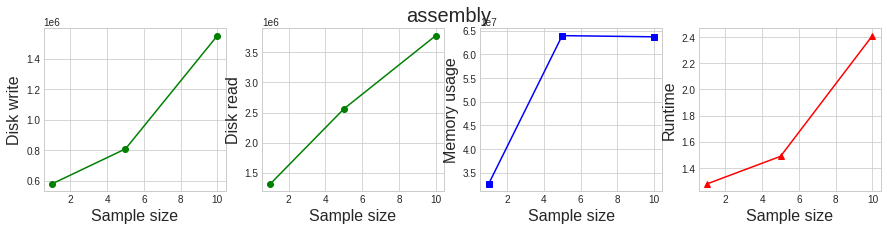

In [8]:
# Indexing Plots
benchmark.multibench.plot_resources(multibench_results, sample_sizes, "assembly")